ASSIGNMENT 2 MACHINE LEARNING FOR JESCA NAMPEWO ACCESS NO 28749



In [25]:
# Import libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [26]:
#creating data frame work for the data set
test=pd.read_csv("test.csv.xls")
test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


testing dataset properly imported

In [27]:
train=pd.read_csv("train.csv.xls")
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


train data set also properly imported

In [28]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [30]:
train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [31]:
train_new=train.drop_duplicates()
train_new

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


this indicates that the data set had no duplicates

In [32]:
#visualising the data set
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

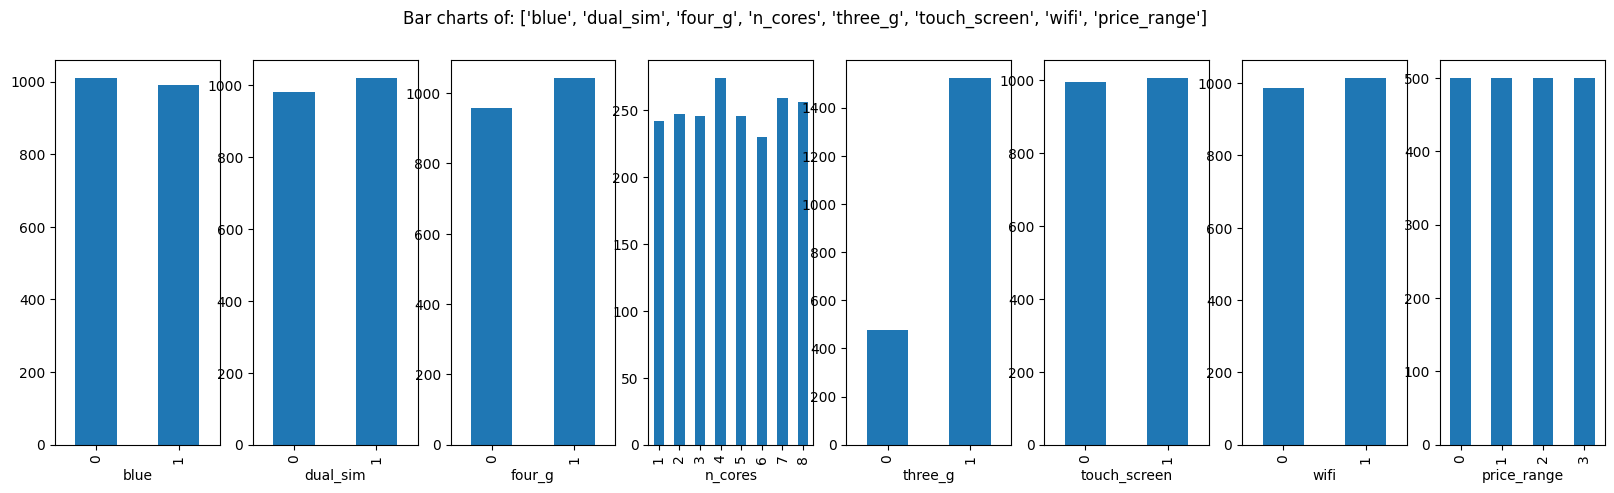

In [33]:
#Using the function for categorical variables in dataset
PlotBarCharts(inpData=train, colsToPlot=['blue', 'dual_sim', 'four_g','n_cores','three_g','touch_screen','wifi','price_range'])

array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'fc'}>,
        <Axes: title={'center': 'int_memory'}>],
       [<Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'px_height'}>],
       [<Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>,
        <Axes: title={'center': 'talk_time'}>],
       [<Axes: title={'center': 'sc_w'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

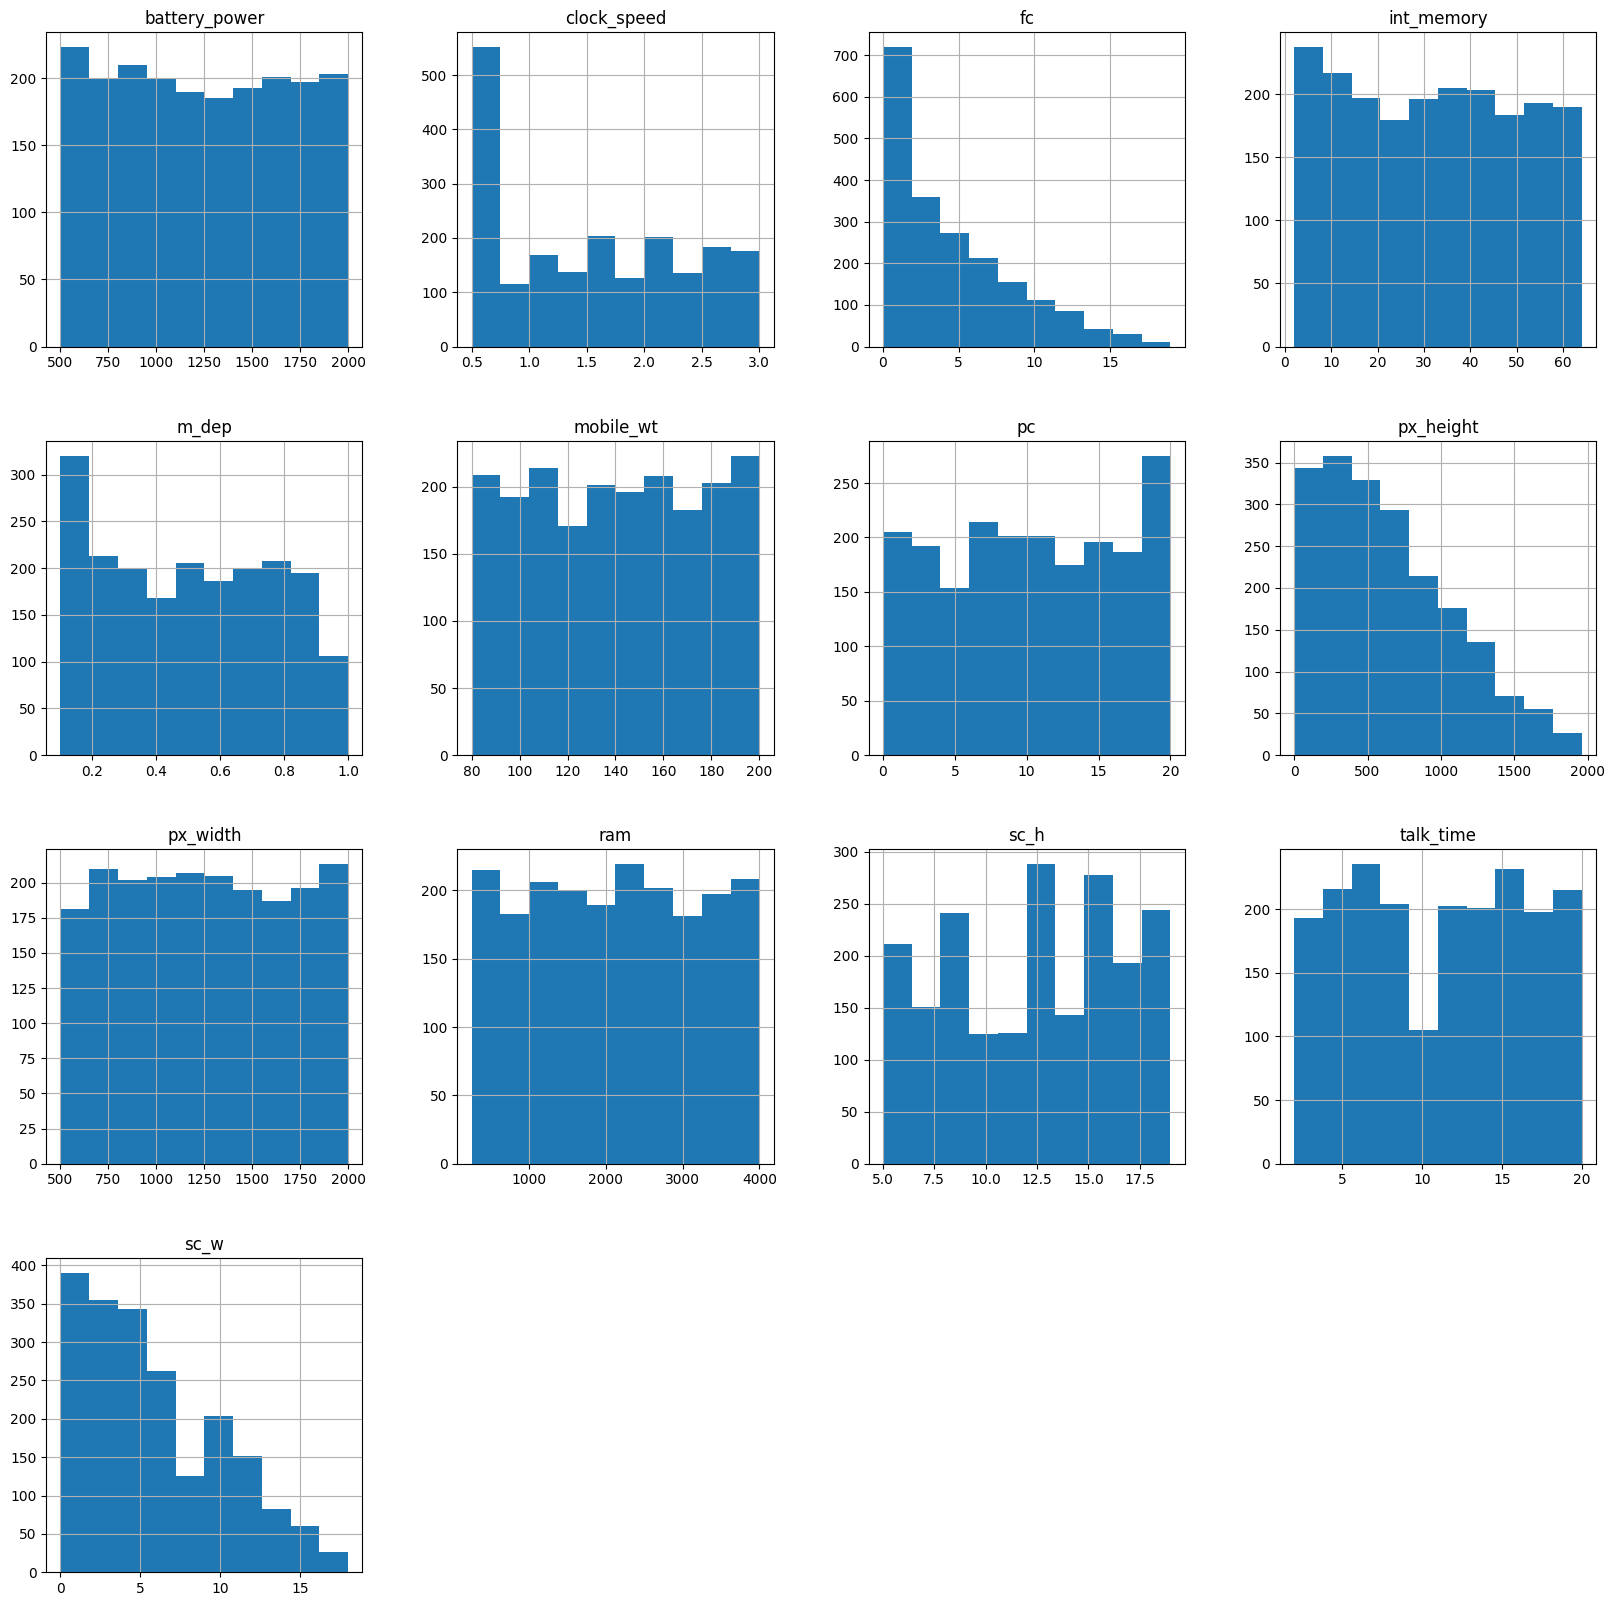

In [34]:
#visualising the corelation
train.hist(['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','pc','px_height','px_width','ram','sc_h','talk_time','sc_w'],figsize=(20,20))



descibe the visuals

In [35]:
categorical=train[['blue', 'dual_sim', 'four_g','n_cores','three_g','touch_screen','wifi','price_range']]
continuous=[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','pc','px_height','px_width','ram','sc_h','talk_time','sc_w']]

In [36]:
#since the bar plots are not conclusive alone,we then use the tests 
#starting with chi-square test to establish the relationship between the categorical variable and target variable
#Run the chisquare distribution

#hypothesis: 
#the categorical variables 'blue', 'dual_sim', 'four_g','n_cores','three_g','touch_screen','wifi are not correlated with price range
#'blue', 'dual_sim', 'four_g','n_cores','three_g','touch_screen','wifi are corelated with price range

from sklearn.feature_selection import chi2
x=categorical.drop(columns=["price_range"])
y=categorical['price_range']

In [37]:
chi_scores=chi2(x,y)
print(chi_scores)


(array([0.72323232, 0.63101079, 1.52157239, 9.09755558, 0.32764281,
       1.92842942, 0.42209073]), array([0.86772634, 0.88929789, 0.67730046, 0.02802156, 0.95474847,
       0.5873935 , 0.9356422 ]))


<Axes: >

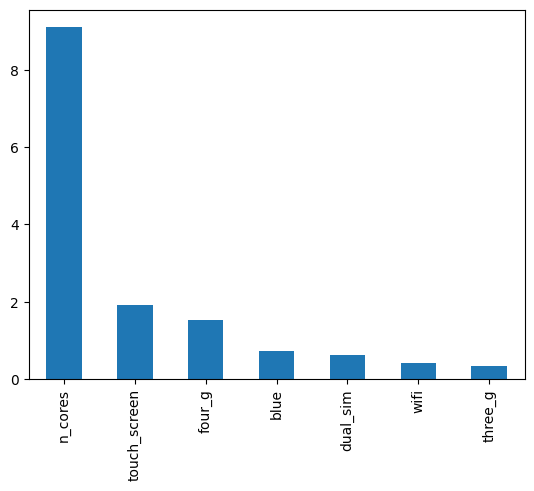

In [38]:
#the higher the chi-values higher the importance
chi_values=pd.Series(chi_scores[0],index=x.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()


<Axes: >

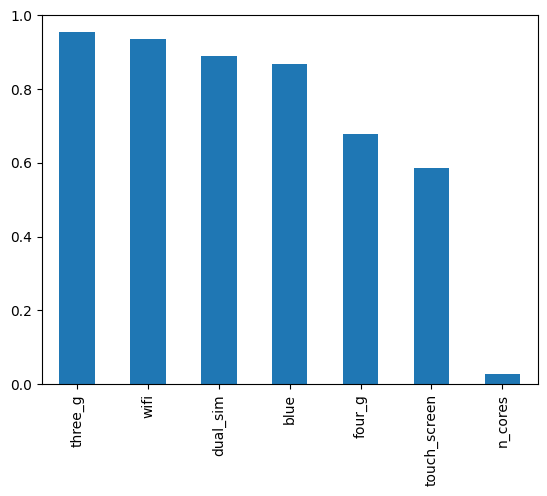

In [39]:
#the higher the p-value ie >0.05 the lower the importance
p_values=pd.Series(chi_scores[1],index=x.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values.plot.bar()

for variables whose p_values >0.05 we shall drop them and in this case only n_cores qualifies with p_value of 0.02802156 hence we n_cores is correlated with price range.

In [40]:
#testing the relationship between the continuous variables and the price range
continuous

[['battery_power',
  'clock_speed',
  'fc',
  'int_memory',
  'm_dep',
  'mobile_wt',
  'pc',
  'px_height',
  'px_width',
  'ram',
  'sc_h',
  'talk_time',
  'sc_w']]

In [100]:
#ANOVA tests:
#hypothesis:There is NO relation between the given variables =null hypothesis

# Defining a function to find the statistical relationship with all the continuous variables and the categorical target variable
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
        return(SelectedPredictors)
    

In [ ]:
#Or use the function to check all the continuos variables for their correlations with categorical target variable price_range
CategoricalPredictorList=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','pc','px_height','px_width','ram','sc_h','talk_time','sc_w']
FunctionAnova(inpData=train, 
              TargetVariable='price_range', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

battery_power is correlated with price_range | P-Value: 0.04957545473862269
clock_speed is NOT correlated with price_range | P-Value: 0.28622989469313764
fc is NOT correlated with price_range | P-Value: 0.5665267636624438
int_memory is correlated with price_range | P-Value: 0.01981239195388322
m_dep is NOT correlated with price_range | P-Value: 0.8032363504069628
mobile_wt is NOT correlated with price_range | P-Value: 0.17407865884917983
pc is NOT correlated with price_range | P-Value: 0.05448266991360537
px_height is NOT correlated with price_range | P-Value: 0.5775599944724239
px_width is NOT correlated with price_range | P-Value: 0.05670264551332557
ram is correlated with price_range | P-Value: 1.8919797399542188e-109
sc_h is NOT correlated with price_range | P-Value: 0.3594669523226646
talk_time is NOT correlated with price_range | P-Value: 0.992256183833355
sc_w is correlated with price_range | P-Value: 0.01190735037492218


only the variables whose P-Value is <0.05 have a significant correlation with the target variable price range
therefore only continuous variables ('battery_power','int_memory','ram','sc_w) are correlated with the categorical variable price_range

In [43]:
# Generate the predictor input
X= train.drop(columns=['blue', 'dual_sim', 'four_g','three_g','touch_screen','wifi','price_range','clock_speed','fc','m_dep','mobile_wt','pc','px_height','px_width','sc_h','talk_time'])
X


,battery_power,int_memory,n_cores,ram,sc_w
0,842,7,2,2549,7
1,1021,53,3,2631,3
2,563,41,5,2603,2
3,615,10,6,2769,8
4,1821,44,2,1411,2
...,...,...,...,...,...
1995,794,2,6,668,4
1996,1965,39,4,2032,10
1997,1911,36,8,3057,1
1998,1512,46,5,869,10


In [44]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [45]:
# Building the model

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [46]:
# train the model
model.fit(X, y)

DecisionTreeClassifier()

In [47]:
test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [74]:
xi=test.drop(columns=['id','blue', 'dual_sim', 'four_g','three_g','touch_screen','wifi','clock_speed','fc','m_dep','mobile_wt','pc','px_height','px_width','sc_h','talk_time'])
xi

,battery_power,int_memory,n_cores,ram,sc_w
0,1043,5,3,3476,7
1,841,61,5,3895,0
2,1807,27,3,2396,10
3,1546,25,8,3893,0
4,1434,49,6,1773,8
...,...,...,...,...,...
995,1700,54,7,2121,8
996,609,13,4,1933,1
997,1185,8,1,1223,0
998,1533,50,2,2509,11


In [75]:
#make predictions
prediction = model.predict([[1043, 5,3,3476, 7]])
prediction 

array([3], dtype=int64)

based on the prediction above the first row in our test data ,the price_range shall be in 3

In [76]:

prediction = model.predict(xi)
prediction 

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 1, 2, 1, 3, 2, 1, 2,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 1, 3, 0, 0, 1, 3, 2, 3, 2, 1, 2, 0, 0,
       0, 1, 0, 2, 1, 3, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 2, 1, 1,
       1, 3, 1, 2, 1, 1, 2, 3, 3, 0, 2, 0, 2, 3, 1, 3, 3, 0, 3, 0, 3, 1,
       3, 1, 1, 2, 3, 0, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2, 1, 3, 0, 1, 3, 3,
       3, 3, 1, 3, 2, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 2, 1, 2, 0, 3, 2, 1, 3, 1, 2, 2, 3, 3, 2, 2, 3, 3, 3, 1, 0,
       2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 1, 0, 0, 0, 1, 3, 1, 1, 0, 1, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 3, 3, 2, 2, 1, 0, 1, 1, 1, 2, 1, 2, 3, 2, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 3, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 2, 3, 0, 0, 3, 2, 3, 1, 3, 2, 0, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 2, 0, 1, 3, 0, 0, 3, 2, 3,
       2, 2, 1, 3, 2, 2, 3, 2, 2, 1, 2, 0, 2, 3, 1,

In [95]:
# saving predictions as a csv file
df = pd.DataFrame(prediction)  # Wrap the array in a DataFrame
df.to_csv('prediction.csv', index=False)  # Save as CSV

In [50]:
# test model for 20%

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
 
score = accuracy_score(y_test, prediction)
score

0.7425

### The accuracy score for 20% test data and 80% training data is "0.79" meaning that the model is 79% accurate

In [51]:
# Save model as a joblib


import joblib
joblib.dump(model, 'train.joblib')

['train.joblib']

In [66]:
# Generate .dot file
#Decision tree

from sklearn import tree

tree.export_graphviz(model,
                     out_file = 'price_range_Predictor.dot', 
                     feature_names = ['battery_power','int_memory','n_cores','ram','sc_w'], 
                     class_names = [str(c) for c in sorted(y.unique())],
                     label= 'all', 
                     rounded = True,
                     filled= True)

In [67]:
#Using the developed model to determine price_range of cellphones in the test dataset.

import joblib as joblib

In [68]:
#loading the model
model=joblib.load('train.joblib')